In [ ]:
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
with open('../i_data/predictions.pickle', 'rb') as f:
    y = pickle.load(f)
frac_results_df = y['frac_results_df']
results_df = y['results_df']
quick_results_df = y['quick_results_df']
date_results_df = y['date_results_df']

In [ ]:
# quick_results_df[
#     (quick_results_df.model_name == 'Most Frequent') & (quick_results_df['type'] == 'tweets')
# ].groupby('label').test_mean.mean().sort_values()

In [ ]:
results_df.words.fillna("none", inplace=True)
for name, group in results_df.groupby('label'):
    print(name)
    print(group.groupby(['model_name', 'words'])[['accuracy', 'roc_auc']].mean())
    print(group.groupby(['model_name', 'words'])[['accuracy', 'roc_auc']].std())

believable_quant
                     accuracy   roc_auc
model_name    words                    
LGBM          none   0.890882  0.621883
              tfidf  0.892943  0.627964
              vecs   0.891792  0.626910
Most Frequent none   0.849542  0.500000
                     accuracy   roc_auc
model_name    words                    
LGBM          none   0.026373  0.104978
              tfidf  0.025324  0.105706
              vecs   0.025753  0.102883
Most Frequent none   0.062645  0.000000
classification_quant
                     accuracy   roc_auc
model_name    words                    
LGBM          none   0.936833  0.660139
              tfidf  0.938288  0.666748
              vecs   0.937864  0.663497
Most Frequent none   0.901493  0.500000
                     accuracy   roc_auc
model_name    words                    
LGBM          none   0.014893  0.143447
              tfidf  0.013186  0.143977
              vecs   0.013666  0.143015
Most Frequent none   0.047467  0.000000
ha

In [ ]:
nice_names_map = {
    'believable_quant': 'Claim in tweet is believable',
    'classification_quant': 'Claim in tweet merits Notes',
    'harmful_quant': 'Claim in tweet is harmful',
    'val_quant': 'Claim in tweet is difficult to validate',
    'misleadingFactualError': 'Tweet has factual error',
    'misleadingMissingImportantContext': 'Tweet is missing important context',
    'misleadingUnverifiedClaimAsFact': 'Tweet treats unverified claim as fact',
    'notMisleadingFactuallyCorrect': 'Tweet is factually correct',

    'helpful_quant': 'Note is helpful',
    'helpfulClear': 'Note is clear',
    'helpfulAddressesClaim': 'Note addresses claim',
    'helpfulGoodSources': 'Note uses good sources',
}

Table X shows predictive accuracy for every case.

In Figure Y, we highlight the five labels with the largest difference between maximum model performance and the performance of``guess most frequent label'' approach, i.e. the cases in which machine learning provides a meaningful boost in performance for Twitter users.

In [ ]:
results_df['Task'] = results_df.label.map(nice_names_map)
date_results_df['Task'] = date_results_df.label.map(nice_names_map)

In [ ]:
results_df

,label,model_name,trn_mean,test_mean,num_trn,num_test,accuracy,roc_auc,precision,recall,f1,type,fold_number,words,features,Task
0,believable_quant,Most Frequent,0.860791,0.804545,13196,3300,0.804545,0.500000,0.804545,1.000000,0.891688,tweets,0.0,none,"has_questionmark,has_exclamationmark,has_perio...",Claim in tweet is believable
1,classification_quant,Most Frequent,0.910579,0.865152,13196,3300,0.865152,0.500000,0.865152,1.000000,0.927701,tweets,0.0,none,"has_questionmark,has_exclamationmark,has_perio...",Claim in tweet merits Notes
2,harmful_quant,Most Frequent,0.678387,0.743636,13196,3300,0.743636,0.500000,0.743636,1.000000,0.852972,tweets,0.0,none,"has_questionmark,has_exclamationmark,has_perio...",Claim in tweet is harmful
3,misleadingFactualError,Most Frequent,0.613519,0.556061,13196,3300,0.556061,0.500000,0.556061,1.000000,0.714703,tweets,0.0,none,"has_questionmark,has_exclamationmark,has_perio...",Tweet has factual error
4,misleadingMissingImportantContext,Most Frequent,0.610488,0.562121,13196,3300,0.562121,0.500000,0.562121,1.000000,0.719690,tweets,0.0,none,"has_questionmark,has_exclamationmark,has_perio...",Tweet is missing important context
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,helpful_quant,LGBM,0.734777,0.718508,13943,3485,0.733716,0.580954,0.755512,0.930511,0.833930,notes,NaN,vecs,"has_questionmark,has_exclamationmark,has_perio...",Note is helpful
236,helpfulAddressesClaim,LGBM,0.318009,0.447346,13943,3485,0.592539,0.565542,0.584242,0.309173,0.404362,notes,NaN,vecs,"has_questionmark,has_exclamationmark,has_perio...",Note addresses claim
237,helpfulClear,LGBM,0.393674,0.474605,13943,3485,0.585366,0.582263,0.568977,0.521161,0.544020,notes,NaN,vecs,"has_questionmark,has_exclamationmark,has_perio...",Note is clear
238,helpfulGoodSources,LGBM,0.375457,0.484935,13943,3485,0.682640,0.685969,0.638520,0.796450,0.708794,notes,NaN,vecs,"has_questionmark,has_exclamationmark,has_perio...",Note uses good sources


In [ ]:
results_df.loc[results_df.model_name == 'Most Frequent', 'words'] = 'baseline'

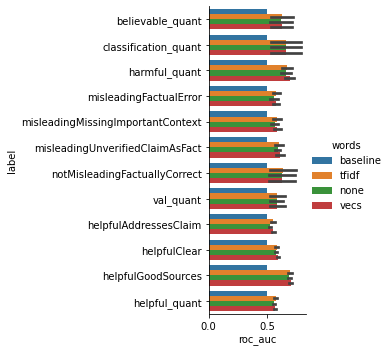

In [ ]:
g = sns.catplot(
    data=results_df,
    y="label", x="roc_auc",
    hue='words',
    legend=True, kind='bar', ci='sd')

# # plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.savefig('../figures/approaches.png', dpi=300)

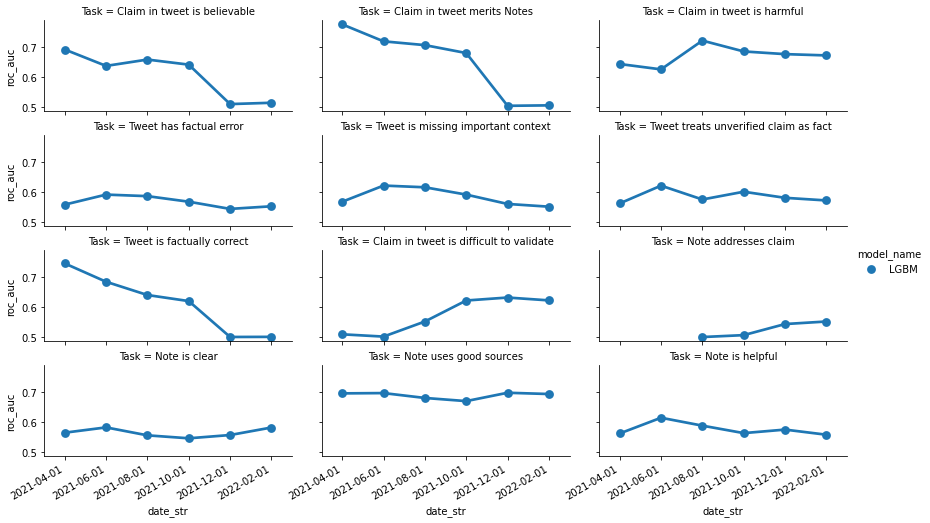

In [ ]:
date_results_df['date_str'] = pd.to_datetime(date_results_df['date']).dt.strftime('%Y-%m-%d')
g = sns.catplot(
    data=date_results_df,
    y="roc_auc", x="date_str",
    col='Task', col_wrap=3, hue='model_name',
    aspect=2, height=2, legend=True, kind='point')

# # plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()
plt.savefig('../figures/date_auroc1.png', dpi=300)

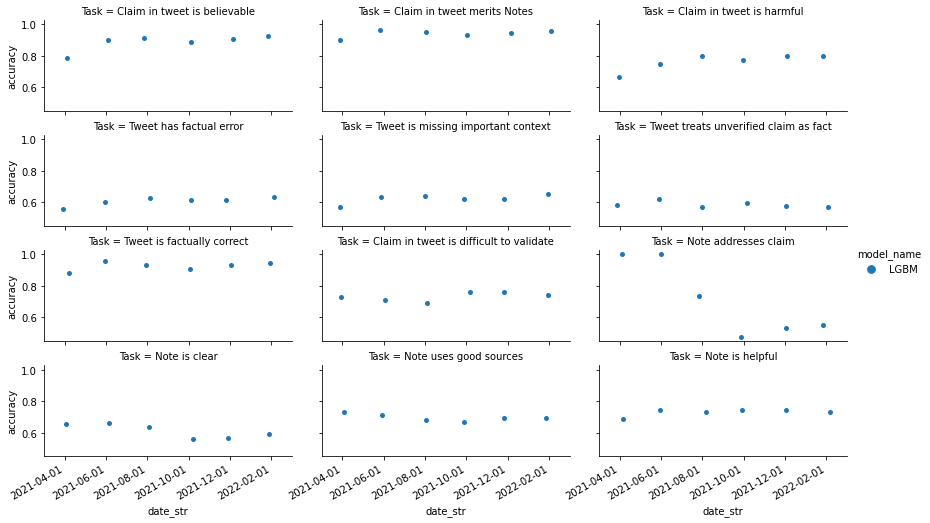

In [ ]:
g = sns.catplot(
    data=date_results_df, y="accuracy", x="date_str",
    col='Task', col_wrap=3, hue='model_name',
    aspect=2, height=2,legend=True)
plt.gcf().autofmt_xdate()

In [ ]:
frac_results_df

,label,model_name,trn_mean,test_mean,num_trn,num_test,accuracy,roc_auc,precision,recall,f1,type,train_frac,words,features
0,believable_quant,LGBM,0.851304,0.856926,1419,3299,0.886632,0.658526,0.898603,0.978069,0.936653,tweets,0.090909,tfidf,"has_questionmark,has_exclamationmark,has_perio..."
1,classification_quant,LGBM,0.901339,0.909973,1419,3299,0.938163,0.723311,0.948685,0.985343,0.966667,tweets,0.090909,tfidf,"has_questionmark,has_exclamationmark,has_perio..."
2,harmful_quant,LGBM,0.682171,0.699303,1419,3299,0.756593,0.678005,0.796764,0.875163,0.834125,tweets,0.090909,tfidf,"has_questionmark,has_exclamationmark,has_perio..."
3,misleadingFactualError,LGBM,0.594785,0.607154,1419,3299,0.618672,0.583566,0.665629,0.747379,0.704139,tweets,0.090909,tfidf,"has_questionmark,has_exclamationmark,has_perio..."
4,misleadingMissingImportantContext,LGBM,0.608175,0.605638,1419,3299,0.638982,0.594696,0.667636,0.804304,0.729625,tweets,0.090909,tfidf,"has_questionmark,has_exclamationmark,has_perio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,val_quant,LGBM,0.268751,0.284025,8893,3299,0.763565,0.613396,0.730205,0.265742,0.389671,tweets,0.909091,tfidf,"has_questionmark,has_exclamationmark,has_perio..."
1196,helpfulAddressesClaim,LGBM,0.345958,0.348924,9611,3485,0.669727,0.594660,0.541828,0.346217,0.422479,notes,0.909091,tfidf,"has_questionmark,has_exclamationmark,has_perio..."
1197,helpfulClear,LGBM,0.414733,0.403156,9611,3485,0.634433,0.609791,0.553469,0.482562,0.515589,notes,0.909091,tfidf,"has_questionmark,has_exclamationmark,has_perio..."
1198,helpfulGoodSources,LGBM,0.399438,0.395696,9611,3485,0.718221,0.717291,0.626514,0.712835,0.666893,notes,0.909091,tfidf,"has_questionmark,has_exclamationmark,has_perio..."


In [ ]:
frac_results_df['percent of training data'] = round(frac_results_df.train_frac * 100)

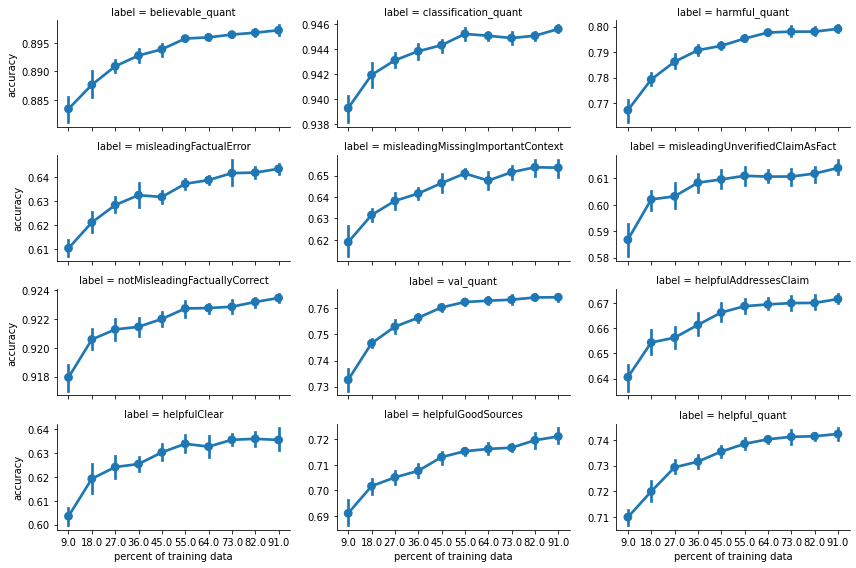

In [ ]:
g = sns.catplot(
    data=frac_results_df, y="accuracy", x='percent of training data',
    col='label', col_wrap=3,
    aspect=2, height=2,
    legend=True, kind='point',sharey=False)
plt.savefig('../figures/learning_curve.png', dpi=300)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0e62a2c-7f45-414e-8164-5bf51e09d482' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>